In [ ]:
# Descargamos la base de datos de perros y gatos del sitio de Microsoft
# https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# y la descomprimimos en la carpeta data
# El archivo original se llama "PetImages.zip" y contiene dos carpetas
# llamadas "Cat" y "Dog" con imágenes de gatos y perros respectivamente.

In [ ]:
!pip install ipykernel
!pip install opencv-python
!pip install keras
!pip install scikit-learn
!pip install tensorflow
!pip install matplotlib

In [1]:
import os
import cv2
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [8]:
import os
import cv2
import numpy as np
from keras.utils import to_categorical

def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Cambiamos la dimensión para que coincida con la dimensión de entrada de VGG-16
            images.append(img)
            if 'Dog_reduced' in folder:
                labels.append(1)
            elif 'Cat_reduced' in folder:
                labels.append(0)
        else:
            print(f"Failed to read image: {filename}")  # Verificar si la imagen se lee correctamente
    return images, labels

dogs_images, dogs_labels = load_images('C:/Users/Kevin/Pictures/Dog_reduced')
cats_images, cats_labels = load_images('C:/Users/Kevin/Pictures/Cat_reduced')

# Combinamos los arrays de perros y gatos
images = np.array(dogs_images + cats_images)
labels = np.array(dogs_labels + cats_labels)

# Verificar si las imágenes y etiquetas están correctas
print(f"Total images: {len(images)}")
print(f"Total labels: {len(labels)}")

# One-hot encoding de las etiquetas
if len(labels) > 0:
    labels = to_categorical(labels)
    print(f"Labels after one-hot encoding: {labels}")
else:
    print("No labels found. Check if the directories contain images.")



Failed to read image: 3136.jpg
Failed to read image: 3288.jpg
Failed to read image: 3588.jpg
Failed to read image: 3300.jpg
Failed to read image: 3491.jpg
Total images: 1997
Total labels: 1997
Labels after one-hot encoding: [[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [9]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [10]:
# Cargamos la red VGG16, asegurándonos de que se dejan fuera las capas superiores de la red preentrenada (head FC layer)
baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Construimos la capa que se colocará en la parte superior del modelo base (baseModel)
model = Sequential()
model.add(baseModel)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Dos clases (perro y gato), por lo que la capa de salida tiene 2 neuronas

# Congelamos las capas del modelo base para que no se actualicen durante el entrenamiento
for layer in baseModel.layers:
    layer.trainable = False

# Compilamos el modelo 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 363s 7s/step - accuracy: 0.8398 - loss: 16.0092 - val_accuracy: 0.9400 - val_loss: 1.5564
Epoch 2/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 387s 8s/step - accuracy: 0.9773 - loss: 0.3414 - val_accuracy: 0.9775 - val_loss: 0.3596
Epoch 3/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 355s 7s/step - accuracy: 0.9936 - loss: 0.0693 - val_accuracy: 0.9725 - val_loss: 0.5007
Epoch 4/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 354s 7s/step - accuracy: 0.9945 - loss: 0.0732 - val_accuracy: 0.9750 - val_loss: 0.4332
Epoch 5/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 343s 7s/step - accuracy: 0.9968 - loss: 0.0330 - val_accuracy: 0.9775 - val_loss: 0.3319
Epoch 6/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 341s 7s/step - accuracy: 0.9999 - loss: 2.1548e-04 - val_accuracy: 0.9625 - val_loss: 0.7222
Epoch 7/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 346s 7s/step - accuracy: 0.9995 - loss: 0.0049 - val_accuracy: 0.9725 - val_loss: 0.6771
Epoch 8/10
50/50 ━━━━━━━━━━━━━━━━━━━━ 350s 7s/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
[[1. 0.]]
Gato


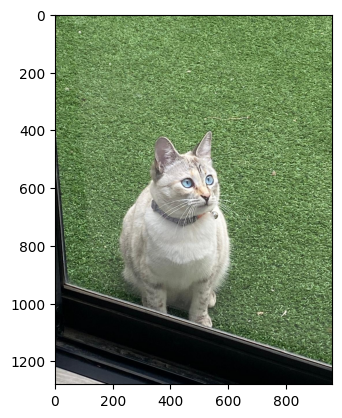

In [11]:
# Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona
img = cv2.imread('Valeria.jpeg')
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(pred)

# Mostramos la etiqueta de la predicción
if pred[0][0] > pred[0][1]:
    print('Gato')
else:
    print('Perro')

# Mostramos la imagen con la etiqueta en el notebook
import matplotlib.pyplot as plt
img = cv2.imread('Valeria.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
[[2.1653765e-23 1.0000000e+00]]
Perro


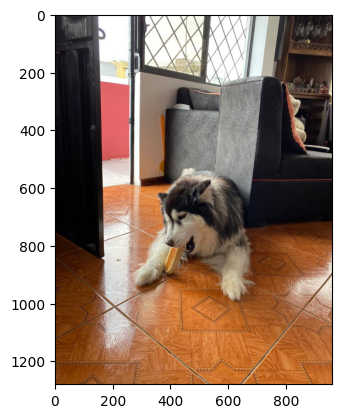

In [13]:
img = cv2.imread('Spock.jpeg')
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(pred)

# Mostramos la etiqueta de la predicción
if pred[0][0] > pred[0][1]:
    print('Gato')
else:
    print('Perro')

# Mostramos la imagen con la etiqueta en el notebook
import matplotlib.pyplot as plt
img = cv2.imread('Spock.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))